In [1]:
from matplotlib import pylab as plt
import numpy as np
from math import ceil
from matplotlib.ticker import FuncFormatter

In [55]:
#Функция для распечатывания 2D графика
def print_2D_graph (input_path, output_path):
    input_file = open (input_path, "r")
        
    graph_preamble = input_file.readline()
    graphic_data = np.loadtxt(input_file, dtype=float, skiprows=0)
    graphic_data = np.transpose(graphic_data)
    
    x = graphic_data[0]
    y = graphic_data[1]    
    
    plt.xlim(np.min(x), np.max(x))
    plt.ylim(np.min(y), np.max(y))
    
    plt.title(graph_preamble)
    plt.plot(x, y)
    
    plt.savefig(output_path, dpi=300, format="png")
    plt.show()
    
    input_file.close()

    
#Функция для распечатывания графика среза
def print_2D_graph_slices (input_path, output_path):
    input_file = open (input_path, "r")   
    
    graph_preamble = input_file.readline()
    graphic_data = np.loadtxt(input_file, dtype=float, skiprows=0)
    graphic_data = np.transpose(graphic_data)
    graphic_data = np.transpose(graphic_data[1:])
    

    x = np.arange(0., 10., 10. / np.shape(graphic_data)[1])
    
    y_n4 = graphic_data[np.shape(graphic_data)[0] // 4]
    y_n2 = graphic_data[np.shape(graphic_data)[0] // 2]
    y_3n4 = graphic_data[(np.shape(graphic_data)[0] * 3) // 4]
    y_n = graphic_data[np.shape(graphic_data)[0] - 1]
    
    
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(graph_preamble)
    fig.tight_layout(pad=2.0)
    
    axs[0,0].plot(x, y_n4)
    axs[0,0].set_title("0.25 *  Time of stabilization")
    
    axs[0,1].plot(x, y_n2)
    axs[0,1].set_title("0.5 *  Time of stabilization")
    
    axs[1,0].plot(x, y_3n4)
    axs[1,0].set_title("0.75 *  Time of stabilization")
    
    axs[1,1].plot(x, y_n)
    axs[1,1].set_title("Time of stabilization")
    
    plt.savefig(output_path, dpi=300, format="png")
    plt.show()
    
    input_file.close()
    
#Функция для распечатывания графика среза
def print_2D_multigraph_slices (input_path, output_path):
    input_file = open (input_path, "r")   
    
    graph_preamble = input_file.readline()
    graphic_data = np.loadtxt(input_file, dtype=float, skiprows=0)
    
    x = graphic_data[0]
    h_graphic_data = graphic_data[1::2]
    v_graphic_data = graphic_data[2::2]
    
    v_n4 = v_graphic_data[np.shape(v_graphic_data)[0] // 4]
    v_n2 = v_graphic_data[np.shape(v_graphic_data)[0] // 2]
    v_3n4 = v_graphic_data[(np.shape(v_graphic_data)[0] * 3) // 4]
    v_n = v_graphic_data[np.shape(v_graphic_data)[0] - 1]

    h_n4 = h_graphic_data[np.shape(h_graphic_data)[0] // 4]
    h_n2 = h_graphic_data[np.shape(h_graphic_data)[0] // 2]
    h_3n4 = h_graphic_data[(np.shape(h_graphic_data)[0] * 3) // 4]
    h_n = h_graphic_data[np.shape(h_graphic_data)[0] - 1]
    
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(graph_preamble)
    fig.tight_layout(pad=2.0)
    
    axs[0,0].plot(x, v_n4, label="V")
    axs[0,0].plot(x, h_n4, label="H")
    axs[0,0].set_title("0.25 *  Time of stabilization")
    axs[0,0].legend(loc='upper left', frameon=False)
    
    axs[0,1].plot(x, v_n2, label="V")
    axs[0,1].plot(x, h_n2, label="H")
    axs[0,1].set_title("0.5 *  Time of stabilization")
    axs[0,1].legend(loc='upper left', frameon=False)
    
    axs[1,0].plot(x, v_3n4, label="V")
    axs[1,0].plot(x, h_3n4, label="H")
    axs[1,0].set_title("0.75 *  Time of stabilization")
    axs[1,0].legend(loc='upper left', frameon=False)
    
    axs[1,1].plot(x, v_n, label="V")
    axs[1,1].plot(x, h_n, label="H")
    axs[1,1].set_title("Time of stabilization")
    axs[1,1].legend(loc='upper left', frameon=False)
    
    plt.savefig(output_path, dpi=400, format="png")
    plt.show()
    
    input_file.close()
    
#Функции для вычисления границ псевдо 3D граффика
def x_format(x, pos):
    return '%d' % int(x*0.1)

def y_format(y, pos):
    return '%d' % int(y*0.01)

formatter_x = FuncFormatter(x_format)
formatter_y = FuncFormatter(y_format)
    
#Функция для распечатывания псевдо-3D графика
def print_3D_graph (input_path, output_path):
    input_file = open (input_path, "r")
        
    graph_preamble = input_file.readline()
    
    graphic_data = np.loadtxt(input_file, dtype=float, skiprows=0)
    graphic_data = np.transpose(graphic_data)
    
    graphic_data = graphic_data[1:]
    
    fig, ax = plt.subplots(nrows=1)
    im = ax.pcolormesh(graphic_data)

    fig.colorbar(im, ax=ax)

    ax.yaxis.set_major_formatter(formatter_y)
    ax.xaxis.set_major_formatter(formatter_x)
    ax.set_xlabel('Время')
    ax.set_ylabel('Пространство')
    
    plt.title(graph_preamble)
    
    plt.savefig(output_path, dpi=300, format="png")
    plt.show()
    
    input_file.close()

In [52]:
#Функции для работы с файловой системой
import os

def get_txt_files(folder):
    files=[]
    for x in os.listdir(folder):
        if x.endswith(".txt"):
            files.append(x)
    return files
            
def delete_format (file_name):
    return os.path.splitext(file_name)[0]

In [53]:
def create_all_graphs(base_dir):
    #Создание 2D графиков для норм H и V
    dir_2d_graphs = base_dir + "norms/"
    input_files = get_txt_files(dir_2d_graphs)

    for file in input_files:
        print_2D_graph(dir_2d_graphs + file, delete_format(dir_2d_graphs + file) + ".png")

    #Создание 2D графиков для потерь массы
    dir_2d_graphs = base_dir + "mass/"
    input_files = get_txt_files(dir_2d_graphs)

    for file in input_files:
        print_2D_graph(dir_2d_graphs + file, dir_2d_graphs + delete_format(file) + ".png")

    #Создание 2D графиков для срезов H и V
    dir_3d_graphs_data = base_dir + "value/"
    dir_slices = base_dir + "slices/"
    input_files = get_txt_files(dir_3d_graphs_data)

    for file in input_files:
        print_2D_graph_slices(dir_3d_graphs_data + file, delete_format(dir_slices + file) + ".png")
    
    #Создание 3D графиков для значений H и V
    dir_3d_graphs = base_dir + "value/"
    input_files = get_txt_files(dir_3d_graphs)

    for file in input_files:
        print_3D_graph(dir_3d_graphs + file, delete_format(dir_3d_graphs + file) + ".png")

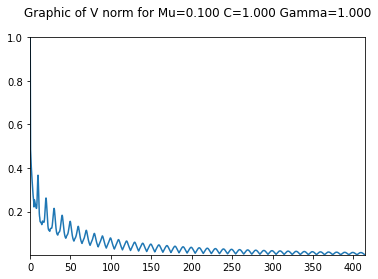

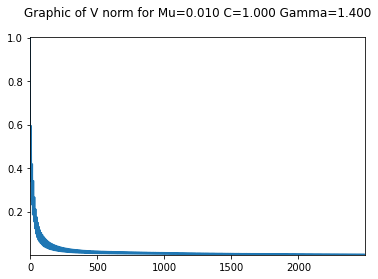

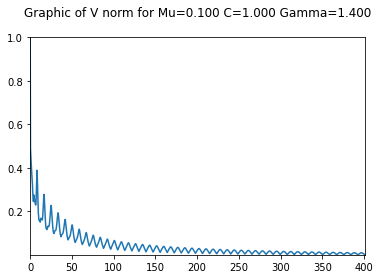

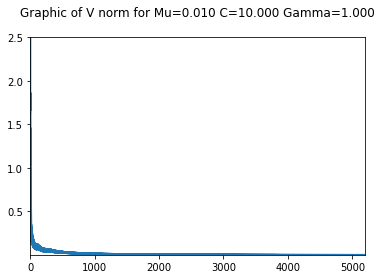

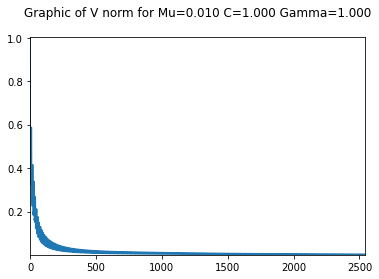

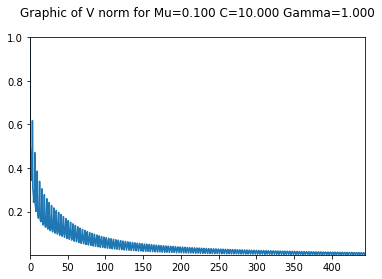

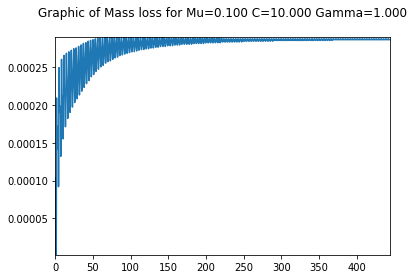

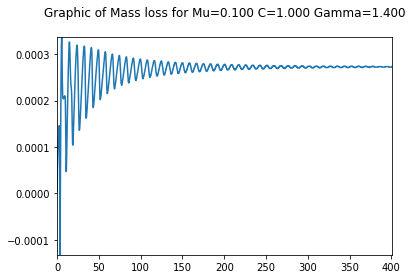

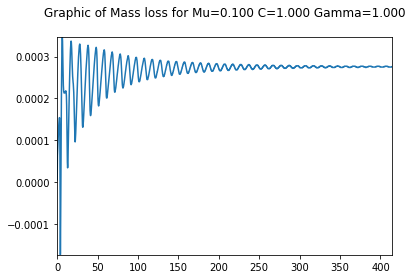

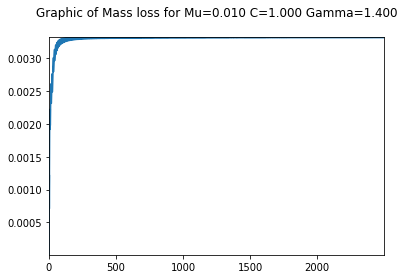

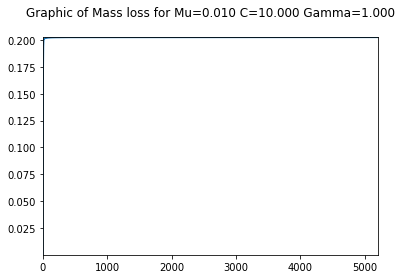

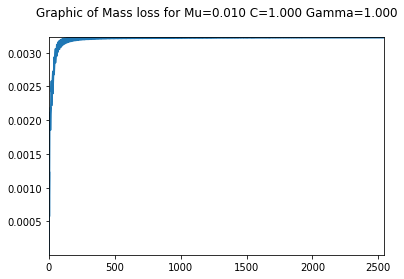

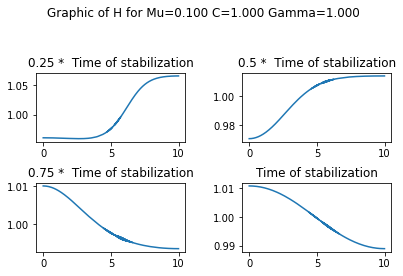

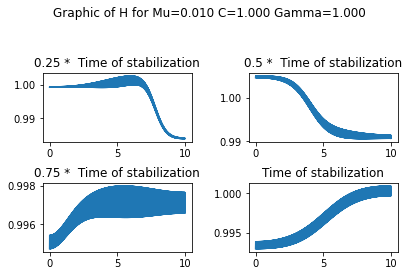

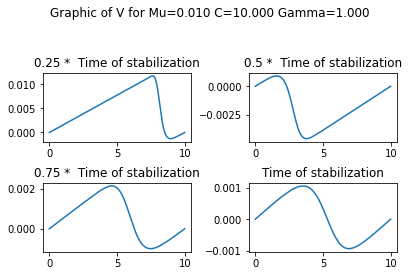

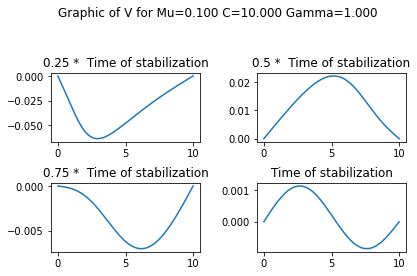

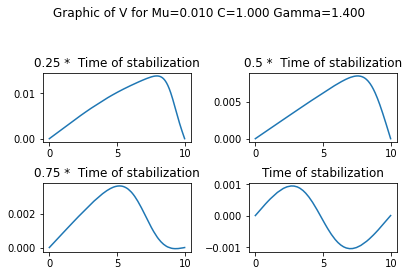

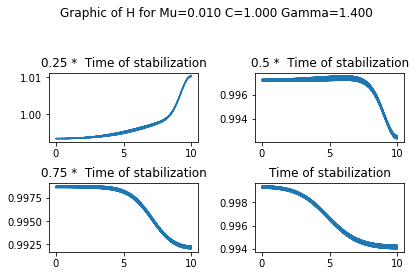

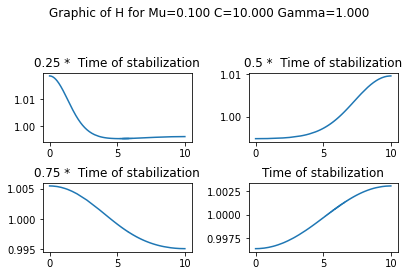

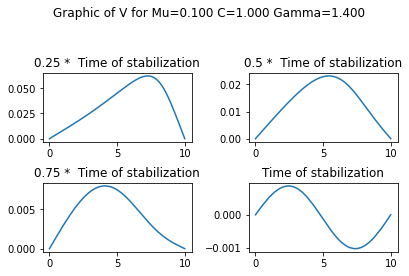

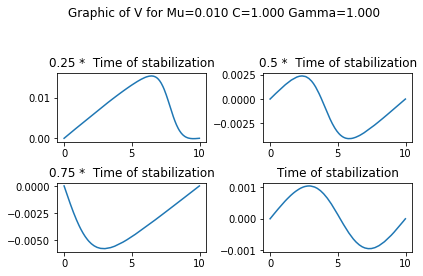

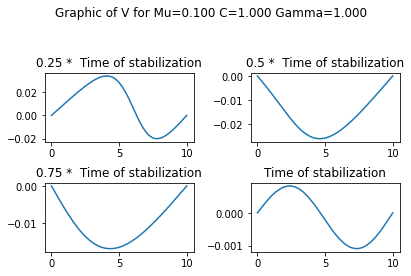

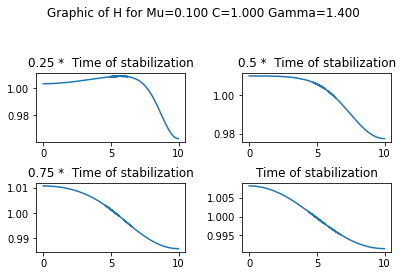

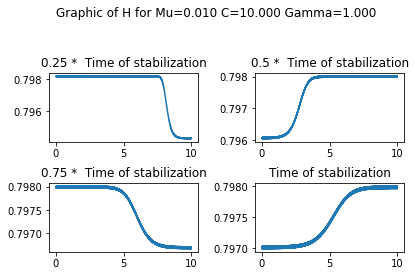

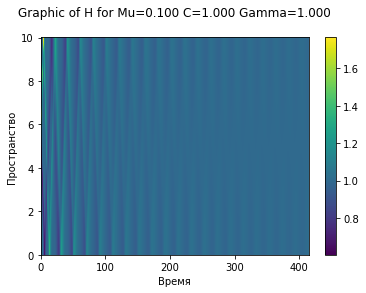

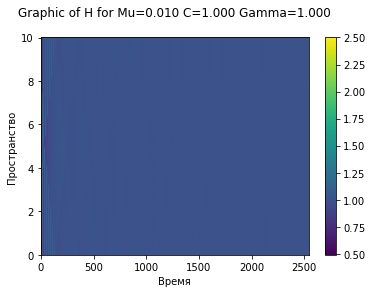

In [ ]:
#create_all_graphs("/home/pam/HomeWork/7sem/Numerical_analysis/hw1/graphs_data_nonsmooth_1/")
create_all_graphs("/home/pam/HomeWork/7sem/Numerical_analysis/hw1/graphs_data_nonsmooth_2/")

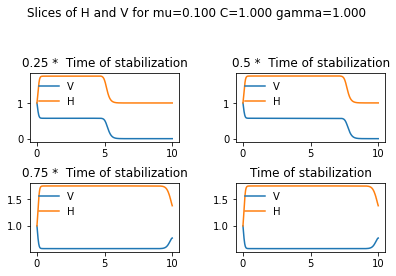

In [56]:
#Создание 2D графиков для срезов H и V для задачи протекания
dir_2d_graphs_data = "/home/pam/HomeWork/7sem/Numerical_analysis/hw1/graph_data_flow/"
dir_slices = "/home/pam/HomeWork/7sem/Numerical_analysis/hw1/graph_data_flow/"
input_files = get_txt_files(dir_2d_graphs_data)

for file in input_files:
        print_2D_multigraph_slices(dir_2d_graphs_data + file, delete_format(dir_slices + file) + ".png")